<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simulate-error-term" data-toc-modified-id="Simulate-error-term-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simulate error term</a></span></li><li><span><a href="#Simulate-X-values" data-toc-modified-id="Simulate-X-values-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simulate X values</a></span></li><li><span><a href="#Generate-Y-values-and-plot-the-population-regression-line" data-toc-modified-id="Generate-Y-values-and-plot-the-population-regression-line-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Generate Y values and plot the population regression line</a></span></li></ul></div>

In [11]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Population Regression Line

Population Regression line is best linear approximation of the true linear relationship between X and Y.

Let us assume the relationship between 2 linearly dependent variables  is defined by Y = a + b*X + E

## Simulate error term

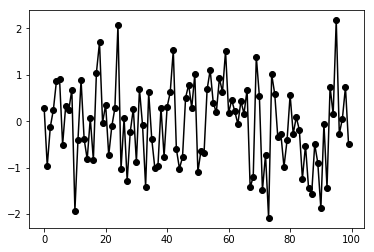

In [12]:
sample_size = 100
mean = 0
std = 1
E = np.random.normal(loc = mean, scale = std, size = sample_size)
plt.plot(E, '-ok')

In [13]:
np.mean(E)

-0.06953721836483491

## Simulate X values

In [14]:
X = np.random.ranf(sample_size)*2

## Generate Y values and plot the population regression line

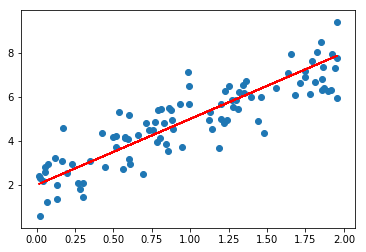

In [15]:
a = 2
b = 3 
Y = a + b*X + E
plt.plot(X, (a + b*X), '-r')
plt.scatter(X, Y)

# Build a least squares line using the above dataset

In [16]:
regr = linear_model.LinearRegression()
X = X.reshape(-1, 1)
regr.fit(X, Y)
y_hat = regr.predict(X)
residuals = Y - y_hat

In [17]:
b_hat = regr.coef_
a_hat = regr.intercept_
print(b_hat, a_hat)

[2.69503365] 2.2308186548861433


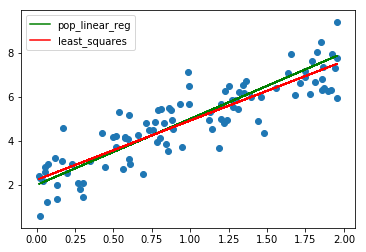

In [18]:
plt.plot(X, (a + b*X), '-g',label ='pop_linear_reg')
plt.scatter(X, Y)
plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares')
plt.legend(loc='upper left')

3.1530333899354444e-16

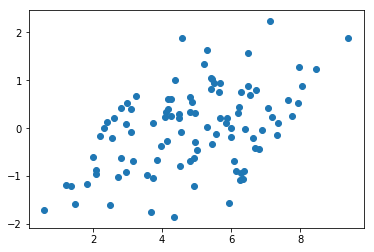

In [19]:
plt.scatter(Y, residuals)
np.mean(residuals)

# Learning point
1. Even though we are using the data generated by the population regression line our least squares line is not the same as the population regression line because we are using only one sample of data to estimate the coefficients.
2. Also remember that the least squares line is generated by using the observed data.
2. If we use multiple samples and generate the coefficients and take the mean of those coefficients then our coefficient estimates would be very very close to the population parameters
3. This process is analogus to the concept of estimating the population mean from sample mean

# Building Least Squares Line using multiple samples

Sample  0 1.9286698595733904 3.290065346778081
Sample  1 2.2887317274059815 2.8346087218694147
Sample  2 1.7307596699514738 3.0045211224318087
Sample  3 1.9297394849426386 3.0892214160932476
Sample  4 1.996287326910831 3.170812431563238
Sample  5 2.1594074645449517 2.9002154832166727
Sample  6 2.0723400478742184 3.0106051512024843
Sample  7 2.1755028717516387 2.8351894029886657
Sample  8 1.8710859268660025 2.946214059113583
Sample  9 2.209098511344342 2.8541034857111325
Sample  10 2.1788069314151706 3.0324597357690988
Sample  11 2.0491966299153543 2.736173862562312
Sample  12 1.878208644075841 3.187569516468708
Sample  13 1.766773771765655 3.1898532680522336
Sample  14 2.18896431433484 2.8416890472375678
Sample  15 1.5198639929189102 3.151973659012173
Sample  16 1.689893440343762 3.286979366467169
Sample  17 1.825322280206242 3.2283107020606394
Sample  18 1.7065997992308004 3.2222962304120126
Sample  19 2.500995226271331 2.6591035505525347
1.9833123960821684 3.023598277978139


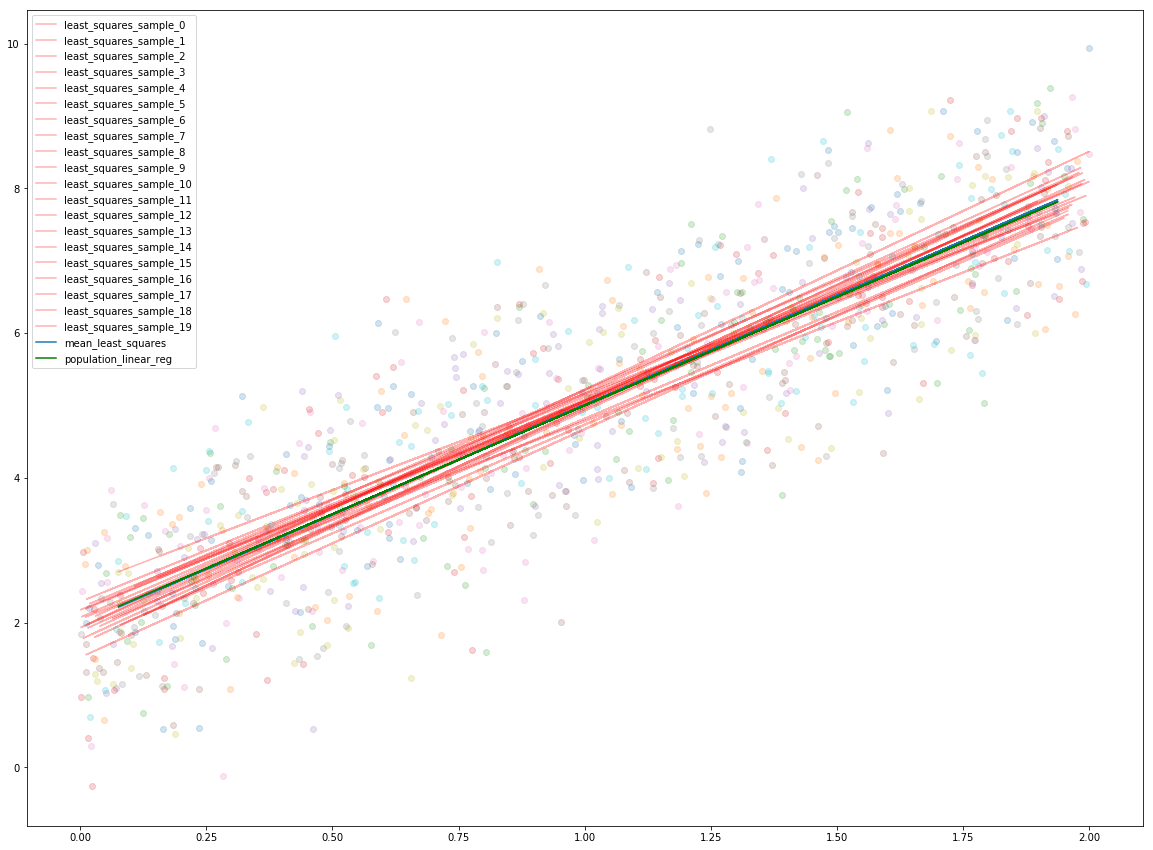

In [20]:
number_of_samples = 20
sample_size = 50
a_list = []
b_list = []
plt.figure(figsize=(20,15))

for sample in range(number_of_samples):
    #Simulate random error
    E = np.random.normal(loc = mean, scale = std, size = sample_size )
    #Simulate X data
    X = np.random.ranf(sample_size)*2
    #Calculate Y using X and E
    Y = a + b*X + E
    #build least squares line
    regr = linear_model.LinearRegression()
    X = X.reshape(-1, 1)
    regr.fit(X, Y)
    b_hat = regr.coef_[0]
    a_hat = regr.intercept_
    print("Sample ",sample, a_hat, b_hat)
    a_list.append(a_hat)
    b_list.append(b_hat)
    plt.scatter(X, Y, alpha=0.2)
    plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares_sample_'+str(sample), alpha=0.3)

a_hat_mean = np.mean(a_list)
b_hat_mean = np.mean(b_list)
print(a_hat_mean, b_hat_mean)
plt.plot(X, (a_hat_mean + b_hat_mean*X), label = 'mean_least_squares')
plt.plot(X, (a + b*X), '-g',label ='population_linear_reg')
plt.legend(loc='upper left')